<a href="https://colab.research.google.com/github/scysco/ONE-Machine_Learning/blob/main/07_Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>1. Clasificando los datos</h1>

### Creando un modelo inicial

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd

In [56]:
datos = pd.read_csv('/content/drive/MyDrive/ONE/ML_Validacion/prestacar.csv')

In [57]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [58]:
X = datos.drop(columns='moroso',axis=1)
y = datos.moroso

In [59]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [60]:
print(f'La exactitud del modelo es: {modelo.score(X,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [63]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8498388642104346


In [64]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9205865272938444
La exactitud del modelo con el conjunto de validación es de: 0.9056702377841651


### Evaluando el modelo

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10356   123]
 [  960    42]]


In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

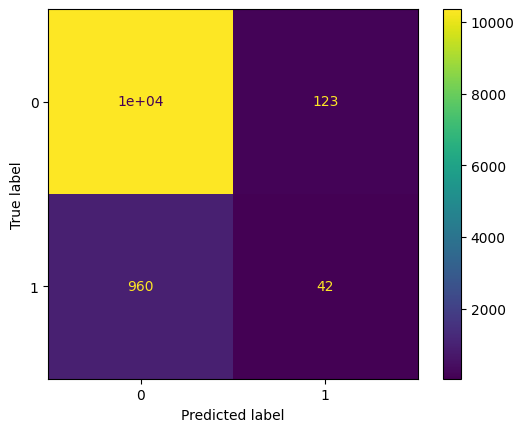

In [68]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

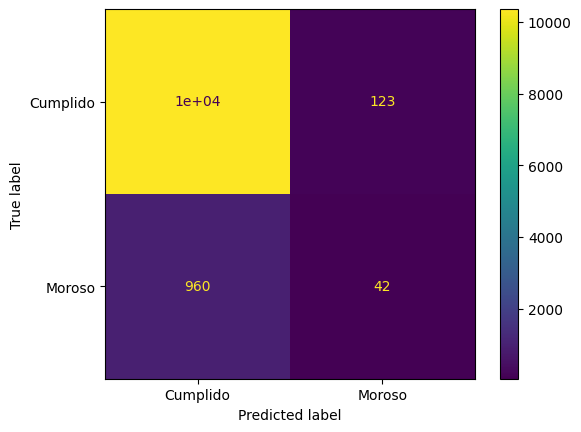

In [69]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido','Moroso'])
visualizacion.plot();

### Desafío: construyendo un segundo modelo

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

*Como un consejo, revisa la documentación del algoritmo `RandomForestClassifier`. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.*

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9152148664343787
Precisión de validación: 0.9128124727811167


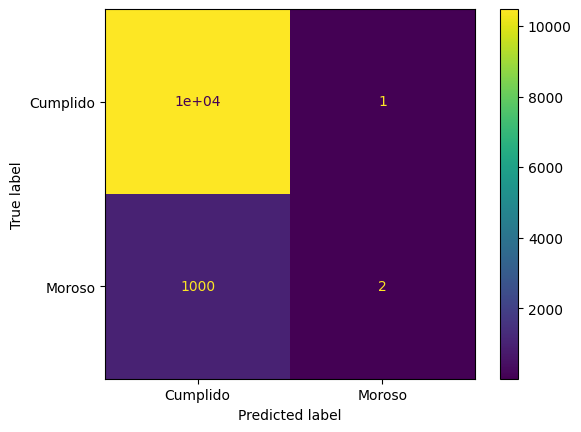

In [72]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

## <font color='dark'>2. Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [74]:
45/(45+123) #precision

0.26785714285714285

In [75]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')

La precisión del modelo es: 0.6666666666666666
La sensibilidad (Recall) del modelo es: 0.001996007984031936
La exactitud (accuracy) del modelo es: 0.9128124727811167


In [76]:
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

El F1-score del modelo es: 0.003980099502487562


### Curva ROC

In [77]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [78]:
from sklearn.metrics import RocCurveDisplay

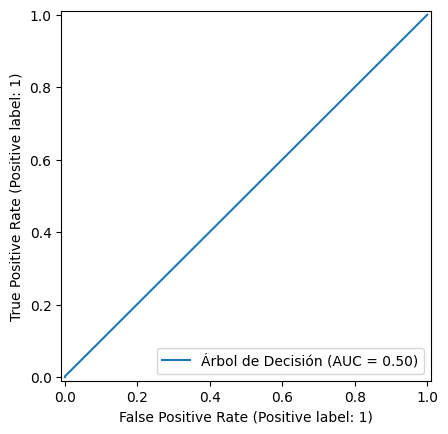

In [79]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Árbol de Decisión');

In [80]:
from sklearn.metrics import roc_auc_score

In [81]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.5009502895154438


### Curva de  precisión x sensibilidad

In [82]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [83]:
from sklearn.metrics import PrecisionRecallDisplay

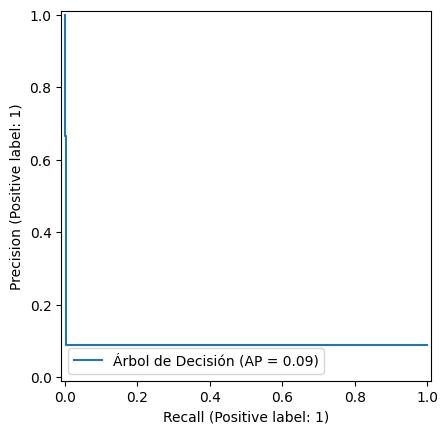

In [84]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de Decisión');

In [85]:
from sklearn.metrics import average_precision_score

In [86]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.0884310987814459


### Informe de métricas

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.67      0.00      0.00      1002

    accuracy                           0.91     11481
   macro avg       0.79      0.50      0.48     11481
weighted avg       0.89      0.91      0.87     11481



## <font color='dark'>3. Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [100]:
from sklearn.model_selection import KFold, cross_validate

In [101]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.19943786, 0.18078947, 0.18067527, 0.18119526, 0.18216991]),
 'score_time': array([0.00253296, 0.00237107, 0.00248027, 0.00237775, 0.00245833]),
 'test_score': array([0.91322809, 0.90777439, 0.90744774, 0.91332753, 0.89993467])}

In [102]:
cv_resultados['test_score']

array([0.91322809, 0.90777439, 0.90744774, 0.91332753, 0.89993467])

In [103]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.908342481966697
El desvío típico es de: 0.0049098766414324676
El intervalo de confianza es: [0.8985227286838321,0.9181622352495619]


### Validación cruzada con sensibilidad

In [104]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [105]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.19016647, 0.19233584, 0.18832064, 0.19679594, 0.19373131]),
 'score_time': array([0.00453544, 0.00418615, 0.00467181, 0.00455713, 0.00517392]),
 'test_score': array([0.02509908, 0.01980198, 0.0196802 , 0.0156658 , 0.02543353])}

In [106]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.01376065316181949,0.02851157669954928]'

### Desafío: validación con otras métricas

Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el classification_report, es necesario utilizar el método cross_validate e informar en el parámetro scoring las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

* Exactitud
* Recall
* Precisión
* F1-score

In [144]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.23191977, 0.19265032, 0.18946886, 0.18485141, 0.19401169]),
 'score_time': array([0.0091939 , 0.00957131, 0.00951004, 0.00955725, 0.01041532]),
 'test_accuracy': array([0.91333696, 0.90722997, 0.90755662, 0.91321864, 0.89939024]),
 'test_recall': array([0.02642008, 0.0210396 , 0.0196802 , 0.01436031, 0.02427746]),
 'test_precision': array([0.25316456, 0.21794872, 0.23529412, 0.20754717, 0.20792079]),
 'test_f1': array([0.04784689, 0.03837472, 0.03632236, 0.02686203, 0.04347826])}

In [145]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [146]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8979277770196471, 0.9183651961091667]
Intervalo de confianza(test_recall): [0.01286930424208624, 0.02944175575228479]
Intervalo de confianza(test_precision): [0.18923785815561794, 0.2595122836237143]
Intervalo de confianza(test_f1): [0.024369300381797417, 0.052784402206268295]


### Estratificando los datos

In [107]:
datos['moroso'].value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [108]:
from sklearn.model_selection import StratifiedKFold

In [109]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

In [110]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.02098253013464582,0.03688777537498834]'

## <font color='dark'>4. Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [113]:
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [114]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')

In [115]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7029026390825267,0.7707569040845782]'

### Pipeline para validación

In [116]:
from imblearn.pipeline import Pipeline as imbpipeline

In [117]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [118]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [119]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.2106540293031817,0.3111768491810074]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [120]:
from imblearn.under_sampling import NearMiss

In [121]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

In [122]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.621966044934928,0.7025354354465152]'

### Probando el modelo

In [123]:
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



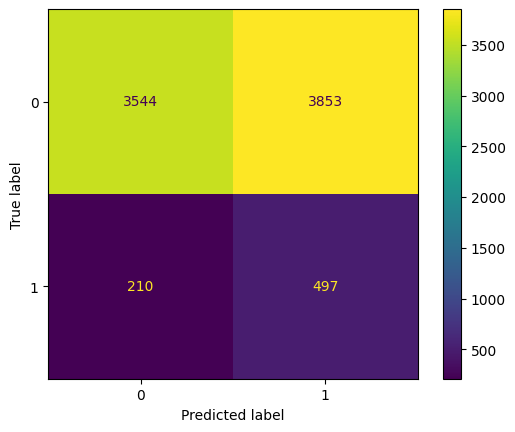

In [124]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### Desafío: otros métodos de balanceo


Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

Como un consejo, revisa la documentación del método SMOTEENN a partir de este enlace para identificar cómo importar el método y cómo utilizarlo.

In [148]:
from imblearn.combine import SMOTEENN
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.2547716799574943,0.40625365931604474]'

# Desafío 1

1. Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

2. Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

3. La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4. La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



In [20]:
import pandas as pd
data_diabetes = pd.read_csv('/content/drive/MyDrive/ONE/ML_Validacion/diabetes.csv')
data_diabetes

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [27]:
x_diab = data_diabetes.drop('diabetes', axis = 1)
y_diab = data_diabetes['diabetes']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_diab, x_test_diab, y_diab, y_test_diab = train_test_split(x_diab, y_diab, stratify = y_diab, test_size = 0.05, random_state = 5)
x_train_diab, x_val_diab, y_train_diab, y_val_diab = train_test_split(x_diab, y_diab, stratify = y_diab, random_state = 5)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
arbol_diab = DecisionTreeClassifier(max_depth = 3)
random_forest_diab = RandomForestClassifier(max_depth = 2)

In [32]:
arbol_diab.fit(x_train_diab, y_train_diab)
print(f'Exactitud de entrenamiento: {arbol_diab.score(x_train_diab, y_train_diab)}')
print(f'Exactitud de validación: {arbol_diab.score(x_val_diab, y_val_diab)}')

Exactitud de entrenamiento: 0.7571428571428571
Exactitud de validación: 0.776595744680851


In [36]:
random_forest_diab.fit(x_train_diab, y_train_diab)
print(f'Exactitud de entrenamiento: {random_forest_diab.score(x_train_diab, y_train_diab)}')
print(f'Exactitud de validación: {random_forest_diab.score(x_val_diab, y_val_diab)}')

Exactitud de entrenamiento: 0.7178571428571429
Exactitud de validación: 0.7021276595744681


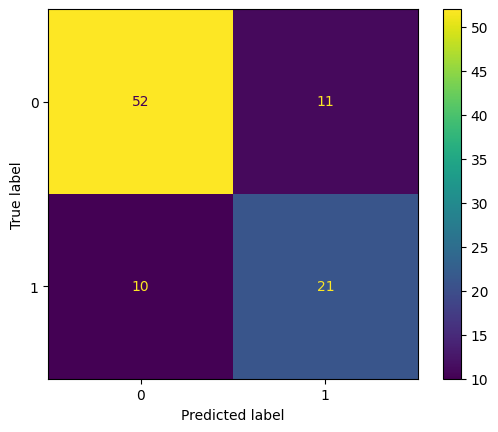

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

prevision_arbol_diab = arbol_diab.predict(x_val_diab)
ConfusionMatrixDisplay.from_predictions(y_val_diab, prevision_arbol_diab);

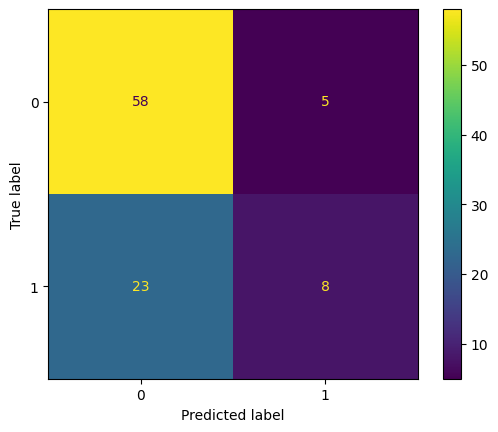

In [38]:
prevision_rf_diab = random_forest_diab.predict(x_val_diab)
ConfusionMatrixDisplay.from_predictions(y_val_diab, prevision_rf_diab);

# Desafio 2

1. Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

2. Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

3. Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

4. Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [89]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [90]:
prevision_arbol_diab = arbol_diab.predict(x_val_diab)

print(f'Exactitud (Decision Tree): {accuracy_score(y_val_diab, prevision_arbol_diab)}')
print(f'Recall (Decision Tree): {recall_score(y_val_diab, prevision_arbol_diab)}')
print(f'Precisión (Decision Tree): {precision_score(y_val_diab, prevision_arbol_diab)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val_diab, prevision_arbol_diab)}')

Exactitud (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisión (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [91]:
prevision_rf_diab = random_forest_diab.predict(x_val_diab)

print(f'Exactitud (Random Forest): {accuracy_score(y_val_diab, prevision_rf_diab)}')
print(f'Recall (Random Forest): {recall_score(y_val_diab, prevision_rf_diab)}')
print(f'Precisión (Random Forest): {precision_score(y_val_diab, prevision_rf_diab)}')
print(f'F1_Score (Random Forest): {f1_score(y_val_diab, prevision_rf_diab)}')

Exactitud (Random Forest): 0.7021276595744681
Recall (Random Forest): 0.25806451612903225
Precisión (Random Forest): 0.6153846153846154
F1_Score (Random Forest): 0.36363636363636365


In [92]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

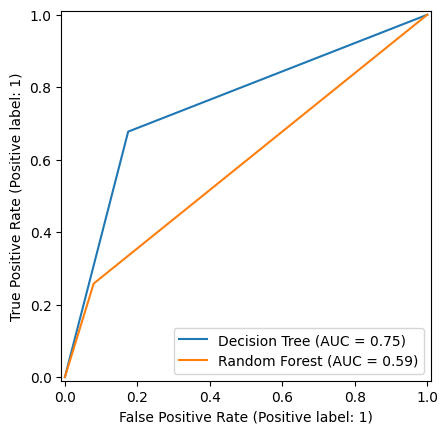

In [93]:
curva_roc_diab = RocCurveDisplay.from_predictions(y_val_diab, prevision_arbol_diab, name = 'Decision Tree')
curva_roc_diab = RocCurveDisplay.from_predictions(y_val_diab, prevision_rf_diab, name = 'Random Forest', ax = curva_roc_diab.ax_)

In [94]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val_diab, prevision_arbol_diab)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val_diab, prevision_rf_diab)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.5893497183819765


In [95]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

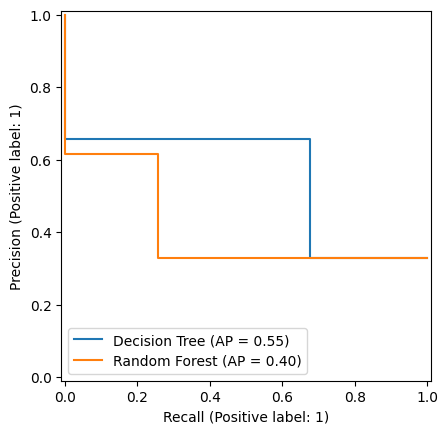

In [96]:
curva_precision_recall_diab = PrecisionRecallDisplay.from_predictions(y_val_diab, prevision_arbol_diab, name = 'Decision Tree')
curva_precision_recall_diab = PrecisionRecallDisplay.from_predictions(y_val_diab, prevision_rf_diab, name = 'Random Forest', ax = curva_precision_recall_diab.ax_)

In [97]:
print(f'AP (Decision Tree): {average_precision_score(y_val_diab, prevision_arbol_diab)}')
print(f'AP (Random Forest): {average_precision_score(y_val_diab, prevision_rf_diab)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.4034897840663112


In [98]:
from sklearn.metrics import classification_report

In [99]:
print('Decision Tree')
print(classification_report(y_val_diab, prevision_arbol_diab))
print('Random Forest')
print(classification_report(y_val_diab, prevision_rf_diab))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        63
           1       0.62      0.26      0.36        31

    accuracy                           0.70        94
   macro avg       0.67      0.59      0.58        94
weighted avg       0.68      0.70      0.66        94



# Desafio 3

1.  En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]

2.  KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

3. En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

4.  En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza

In [125]:
def intervalo_conf(resultados_diab, nombre_modelo_diab):
    media_diab = resultados_diab.mean()
    desvio_tipico_diab = resultados_diab.std()
    print(f'Intervalo de confianza ({nombre_modelo_diab}): [{media_diab - 2*desvio_tipico_diab}, {min(media_diab + 2*desvio_tipico_diab, 1)}]')

In [126]:
from sklearn.model_selection import cross_val_score, KFold

In [127]:
arbol_diab = DecisionTreeClassifier(max_depth = 3)
random_forest_diab = RandomForestClassifier(max_depth = 2)

kf_diab = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol_diab = cross_val_score(arbol_diab, x_diab, y_diab, cv = kf_diab)
resultado_rf_diab = cross_val_score(random_forest_diab, x_diab, y_diab, cv = kf_diab)

intervalo_conf(resultado_arbol_diab, 'Decision Tree')
intervalo_conf(resultado_rf_diab, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confianza (Random Forest): [0.6056951640515899, 0.795016073501753]


In [128]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [129]:
arbol_diab = DecisionTreeClassifier(max_depth = 3)
random_forest_diab = RandomForestClassifier(max_depth = 2)

skf_diab = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol_diab = cross_val_score(arbol_diab, x_diab, y_diab, cv = skf_diab, scoring = 'f1')
resultado_rf_diab = cross_val_score(random_forest_diab, x_diab, y_diab, cv = skf_diab, scoring =  'f1')

intervalo_conf(resultado_arbol_diab, 'Decision Tree')
intervalo_conf(resultado_rf_diab, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.2681981750463088, 0.7354166140441551]
Intervalo de confianza (Random Forest): [0.06271205676032376, 0.6384669156260789]


In [130]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [131]:
arbol_diab = DecisionTreeClassifier(max_depth = 3)
random_forest_diab = RandomForestClassifier(max_depth = 2)

loo_diab = LeaveOneOut()

resultado_arbol_diab = cross_val_score(arbol_diab, x_diab, y_diab, cv = loo_diab)
resultado_rf_diab = cross_val_score(random_forest_diab, x_diab, y_diab, cv = loo_diab)

print(f'Exactitud promedio (Decision Tree): {resultado_arbol_diab.mean()}')
print(f'Exactitud promedio (Random Forest):{resultado_rf_diab.mean()}')

Exactitud promedio (Decision Tree): 0.7085561497326203
Exactitud promedio (Random Forest):0.679144385026738


# Desafio 4

1. El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

2. Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

3. Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

4. Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. Realiza la evaluación del modelo usando los datos de prueba que fueron separados al inicio de los desafíos, obteniendo el informe de métricas y matriz de confusión.

In [132]:
data_diabetes['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


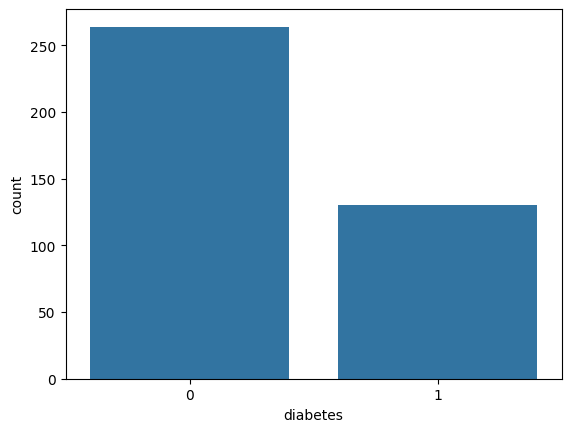

In [133]:
import seaborn as sns
sns.countplot(data_diabetes, x = 'diabetes');

In [134]:
from imblearn.pipeline import Pipeline as imbpipeline

In [135]:

from imblearn.over_sampling import SMOTE

In [136]:
arbol_diab = DecisionTreeClassifier(max_depth = 3)
pipeline_diab = imbpipeline([('oversample', SMOTE()), ('arbol', arbol_diab)])
skf_diab = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol_diab = cross_val_score(pipeline_diab, x_diab, y_diab, cv = skf_diab, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol_diab.mean()}')

F1 (Decision Tree):0.5975122411073176


In [137]:
random_forest_diab = RandomForestClassifier(max_depth = 2)
pipeline_diab = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest_diab)])
skf_diab = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf_diab = cross_val_score(pipeline_diab, x_diab, y_diab, cv = skf_diab, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf_diab.mean()}')

F1 (Random Forest):0.6195561567975361


In [138]:
from imblearn.pipeline import Pipeline as imbpipeline

In [139]:
from imblearn.under_sampling import NearMiss

In [140]:
arbol_diab = DecisionTreeClassifier(max_depth = 3)
pipeline_diab = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol_diab)])
skf_diab = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol_diab = cross_val_score(pipeline_diab, x_diab, y_diab, cv = skf_diab, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol_diab.mean()}')

F1 (Decision Tree):0.5460263484053807


In [141]:
random_forest_diab = RandomForestClassifier(max_depth = 2)
pipeline_diab = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest_diab)])
skf_diab = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf_diab = cross_val_score(pipeline_diab, x_diab, y_diab, cv = skf_diab, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf_diab.mean()}')

F1 (Random Forest):0.6019443035037847


              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



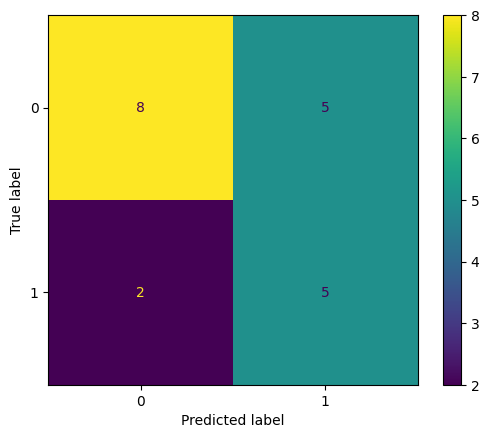

In [142]:
undersample_diab = NearMiss(version = 3)
x_balanceado_diab, y_balanceado_diab = undersample.fit_resample(x_diab, y_diab)

modelo_diab = RandomForestClassifier(max_depth = 2)
modelo_diab.fit(x_balanceado_diab, y_balanceado_diab)
y_previsto_diab = modelo_diab.predict(x_test_diab)

print(classification_report(y_test_diab, y_previsto_diab))
ConfusionMatrixDisplay.from_predictions(y_test_diab, y_previsto_diab);